In [1]:
# Dual Moving Average Crossover - DMAC
# Determine when to buy and sell stock
# when short term cross over a long term average
#   - then signal generated

# Description: This program uses the dual moving average crossover to determine when to buy and sell stock


In [2]:
# Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [5]:
# Store the data
AAPL = pd.read_csv('AAPL.csv')

# Show the data
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-17,116.040001,117.650002,115.500000,117.160004,108.269211,40884700
1,2015-08-18,116.430000,117.440002,116.010002,116.500000,107.659302,34560700
2,2015-08-19,116.099998,116.519997,114.680000,115.010002,106.282379,48286500
3,2015-08-20,114.080002,114.349998,111.629997,112.650002,104.101456,68501600
4,2015-08-21,110.430000,111.900002,105.650002,105.760002,97.734299,128275500
...,...,...,...,...,...,...,...
1254,2020-08-10,450.399994,455.100006,440.000000,450.910004,450.910004,53100900
1255,2020-08-11,447.880005,449.929993,436.429993,437.500000,437.500000,46975600
1256,2020-08-12,441.989990,453.100006,441.190002,452.040009,452.040009,41486200
1257,2020-08-13,457.720001,464.170013,455.709991,460.040009,460.040009,52520500


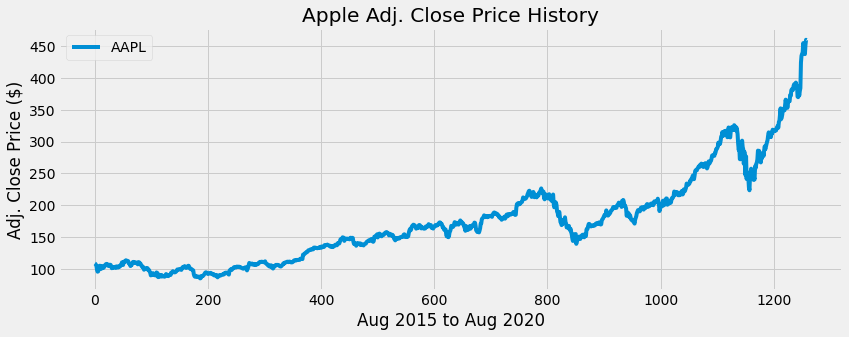

In [7]:
# Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Aug 2015 to Aug 2020')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [45]:
# Create the simple moving average with a 30 days window
SMA30 = pd.DataFrame()
SMA30['Adj Close Price'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,392.747017
1255,395.292722
1256,398.222607
1257,401.442118


In [46]:
# Create a simple moving 100 days average
SMA100 = pd.DataFrame()
SMA100['Adj Close Price'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,327.262937
1255,329.201139
1256,331.439442
1257,333.806227


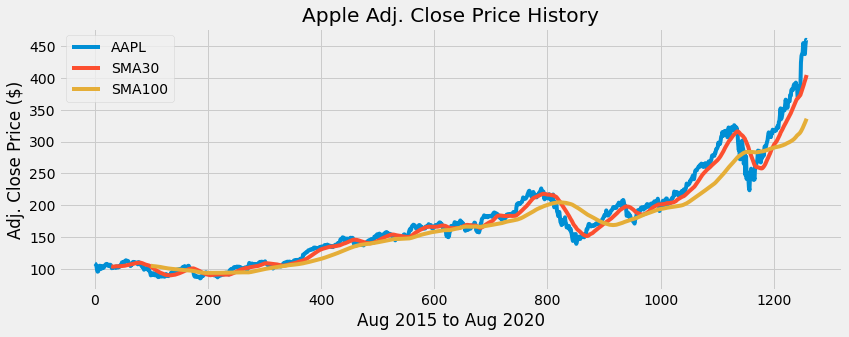

In [48]:
# Visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close Price'], label= 'SMA30')
plt.plot(SMA100['Adj Close Price'], label= 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Aug 2015 to Aug 2020')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left') 
plt.show()

In [49]:
# Create a new dataframe to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close Price']
data['SMA100'] = SMA100['Adj Close Price']
data

,AAPL,SMA30,SMA100
0,108.269211,NaN,NaN
1,107.659302,NaN,NaN
2,106.282379,NaN,NaN
3,104.101456,NaN,NaN
4,97.734299,NaN,NaN
...,...,...,...
1254,450.910004,392.747017,327.262937
1255,437.500000,395.292722,329.201139
1256,452.040009,398.222607,331.439442
1257,460.040009,401.442118,333.806227


In [50]:
# Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  signalPriceBuy = []
  signalPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != -1:
        signalPriceBuy.append(data['AAPL'][i])
        signalPriceSell.append(np.nan)
        flag = 1
      else:
        signalPriceBuy.append(np.nan)
        signalPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        signalPriceBuy.append(np.nan)
        signalPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        signalPriceBuy.append(np.nan)
        signalPriceSell.append(np.nan)
    else:
        signalPriceBuy.append(np.nan)
        signalPriceSell.append(np.nan)

  return (signalPriceBuy,signalPriceSell)

In [51]:
# Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [52]:
# Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,108.269211,NaN,NaN,NaN,NaN
1,107.659302,NaN,NaN,NaN,NaN
2,106.282379,NaN,NaN,NaN,NaN
3,104.101456,NaN,NaN,NaN,NaN
4,97.734299,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1254,450.910004,392.747017,327.262937,450.910004,NaN
1255,437.500000,395.292722,329.201139,437.500000,NaN
1256,452.040009,398.222607,331.439442,452.040009,NaN
1257,460.040009,401.442118,333.806227,460.040009,NaN


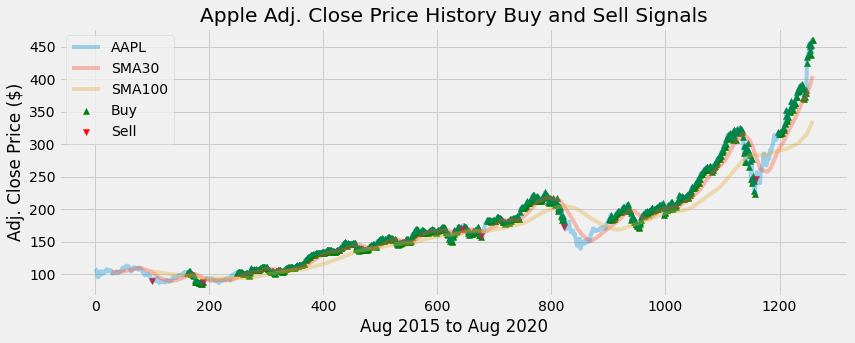

In [53]:
# Visualize the data and the strategy to buy and sell
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha=0.35)
plt.plot(data['SMA30'], label= 'SMA30', alpha=0.35)
plt.plot(data['SMA100'], label= 'SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label= 'Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label= 'Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel('Aug 2015 to Aug 2020')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()